In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from astropy.constants import m_p, M_sun
import astropy.units as u
from plotting_setup import *


sys.path.append('../pipeline_scripts/')
from pipeline_main_nosink import pipeline_nosink
from pipeline_2D_nosink import to_osyris_ivs
from pipeline_main import sink_positions, serialize_directory, sinks, true_sinks, pipeline, calc_ang


core_data = {}
initial_sn = [302, 350, 223, 260, 287, 383, 410, 439, 449]
first_sink_snap = [159, 223, 177, 213, 236, 342, 402, 404, 446]

In [3]:
plot_data = serialize_directory(filename = 'fmr05AM_evolution.pkl', store = False)

In [4]:
plot_data.keys()

dict_keys([6, 13, 14, 25, 82, 122, 162, 180, 225])

In [5]:
plot_data[122].keys()

dict_keys(['disk_size', 'L_tot', 'L_kep', 'time', 'disk_mass', 'orientation'])

In [6]:
disk_mass = {sink: plot_data[sink]['disk_mass']  for sink in sinks}
disk_size = {sink: plot_data[sink]['disk_size'] for sink in sinks}
orienation = {sink: np.rad2deg(np.arccos(np.sum(plot_data[sink]['orientation'] * plot_data[sink]['orientation'][None,-1], axis = 1))) for sink in sinks}
### timesteps with no orientation gives angles of 90 degrees and the final output is a nan-value. This is changed in the loop below ###
for sink in sinks:
    orienation[sink][-1] = 0
    orienation[sink][orienation[sink] == 90.] = np.nan

AM_evo = {sink: plot_data[sink]['L_tot'] / plot_data[sink]['L_kep'] for sink in sinks}


/tmp/ipykernel_1188492/2270225283.py:3: RuntimeWarning: invalid value encountered in arccos
  orienation = {sink: np.rad2deg(np.arccos(np.sum(plot_data[sink]['orientation'] * plot_data[sink]['orientation'][None,-1], axis = 1))) for sink in sinks}
/tmp/ipykernel_1188492/2270225283.py:9: RuntimeWarning: invalid value encountered in true_divide
  AM_evo = {sink: plot_data[sink]['L_tot'] / plot_data[sink]['L_kep'] for sink in sinks}


No handles with labels found to put in legend.


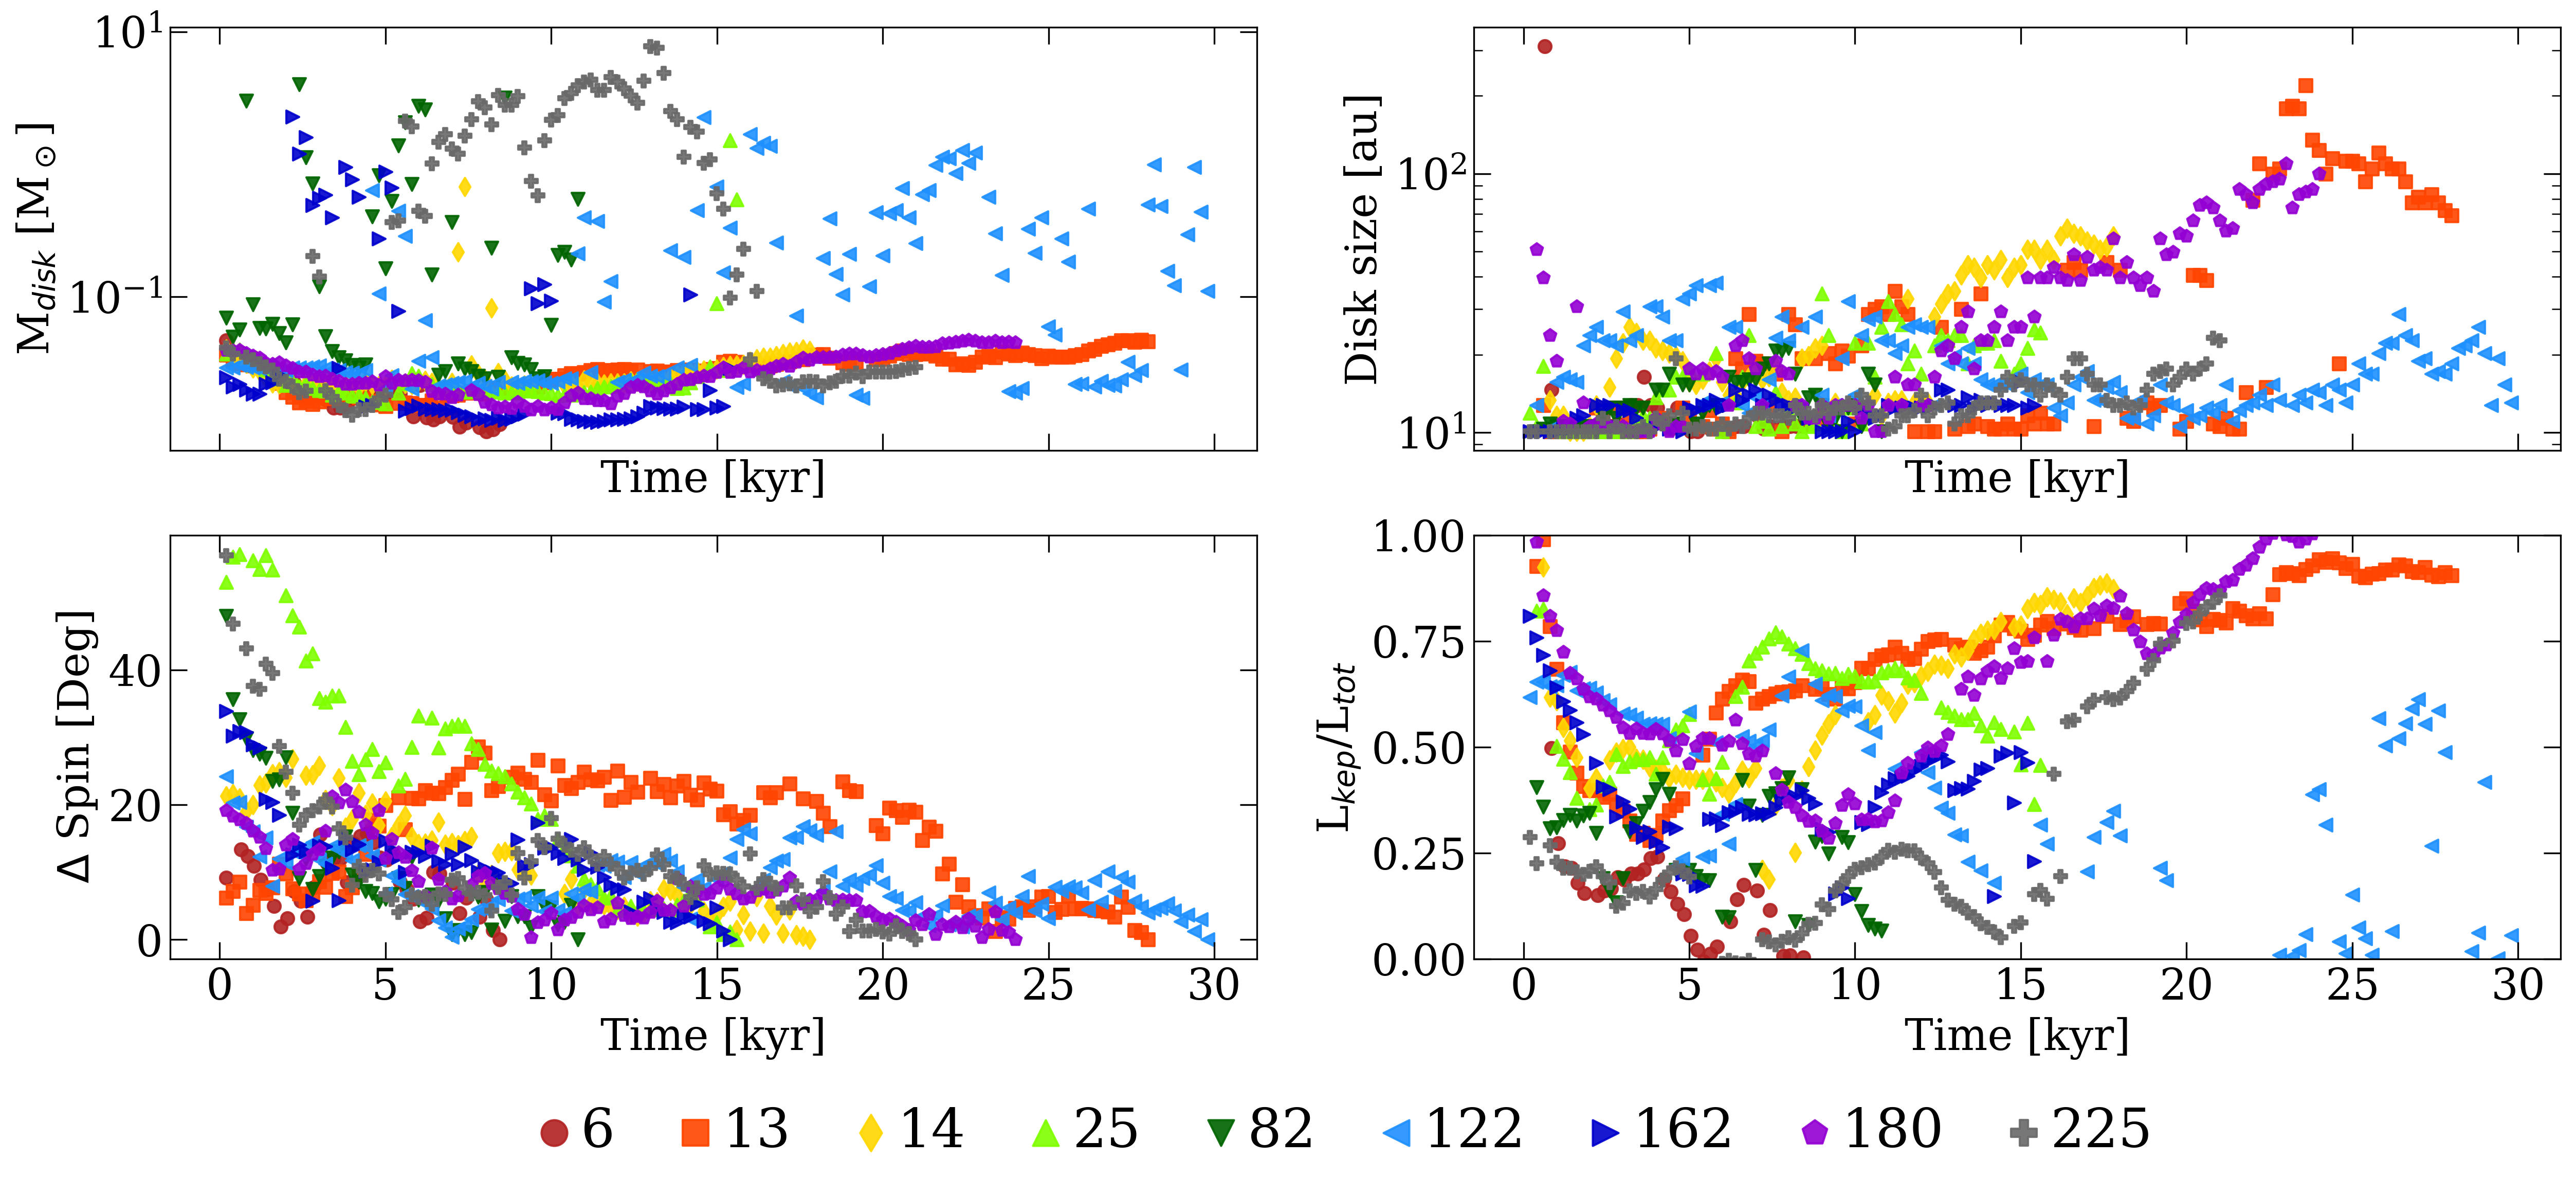

In [7]:

markers = ['o', 's', 'd', '^', 'v', '<', '>', 'p', 'P']

fig, axs = plt.subplots(2,2, figsize = (20, 8), dpi = 300, sharex=True)

axs.flatten()[0].set(ylabel = 'M$_{disk}$ [M$_\odot$]')
axs.flatten()[1].set(ylabel = 'Disk size [au]')
axs.flatten()[2].set(ylabel = '$\Delta$ Spin [Deg]')
axs.flatten()[3].set(ylabel = 'L$_{kep}$/L$_{tot}$', ylim = (0,1))


[ax.set_yscale('log') for ax in axs.flatten()[:2]]
    
for param, ax in zip([disk_mass, disk_size, orienation, AM_evo], axs.flatten()):
    for i, sink in enumerate(sinks):
        ax.set(xlabel = 'Time [kyr]')
        ax.scatter(plot_data[sink]['time'] * 1e-3, param[sink], marker = markers[i], label = sink, color = colors[i], alpha = 0.9)
        #ax.legend(frameon = False, ncol = 2, prop = {'size':14})

cbaxes = fig.add_axes([0.1, 0.02, 0.8, 0.05])
handles, labels = axs[-1, -1].get_legend_handles_labels()
cbaxes.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
cbaxes.legend(handles,labels, loc='upper center', bbox_to_anchor=(0.5, 0.5), frameon = False, ncol=9, prop = {'size':25}, columnspacing=0.5, handletextpad=-0.5, markerscale  = 2)
cbaxes.axis('off')

fig.savefig(save_folder + 'gendisk_evolution', facecolor = 'w', bbox_inches='tight', dpi = 500)
